In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def sphere(x, y, z, radius, x0, y0, z0):
    return 1.0*((x-x0)**2 + (y-y0)**2 + (z-z0)**2 < (radius)**2)

def rectangle(x, y, z, Lx, Ly, Lz, x0, y0, z0):
    return ((numpy.abs(x-x0)<Lx/2*numpy.ones(x.shape))*(numpy.abs(y-y0)<Ly/2*numpy.ones(y.shape)) * (numpy.abs(y-y0)<Ly/2*numpy.ones(z.shape)))

def dynamic_phantom(nx, ny, nz, kTRANS_low, kTRANS_high, kPL_low, kPL_high):
    x = numpy.linspace(-1, 1, nx)
    y = numpy.linspace(-1, 1, ny)
    z = numpy.linspace(-1, 1, nz)
    
    X, Y, Z = numpy.meshgrid(x, y, z)
    
    kTRANS = numpy.zeros(X.shape)
    kTRANS += kTRANS_low*rectangle(X, Y, Z, 0.8, 1.6, 1.6, 0.4, 0, 0)
    kTRANS += kTRANS_high*rectangle(X, Y, Z, 0.8, 1.6, 1.6, -0.4, 0, 0)
    
    kPL = numpy.zeros(X.shape)
    kPL += kPL_low*sphere(X, Y, Z, 0.35, 0.45, 0.45, 0) + (kPL_high - kPL_low)*sphere(X, Y, Z, 0.10, 0.45, 0.45, 0)
    kPL += kPL_low*sphere(X, Y, Z, 0.35, -0.45, 0.45, 0) + (kPL_high - kPL_low)*sphere(X, Y, Z, 0.10, -0.45, 0.45, 0)
    kPL += kPL_high*sphere(X, Y, Z, 0.35, 0.45, -0.45, 0) + (kPL_low - kPL_high)*sphere(X, Y, Z, 0.10, 0.45, -0.45, 0)
    kPL += kPL_high*sphere(X, Y, Z, 0.35, -0.45, -0.45, 0) + (kPL_low - kPL_high)*sphere(X, Y, Z, 0.10, -0.45, -0.45, 0)    
    
    return kTRANS, kPL
    

In [2]:
kTRANS, kPL = dynamic_phantom(256, 256, 256, 0.02, 0.05, 0.01, 0.03)

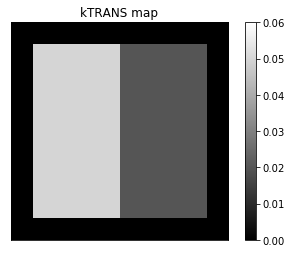

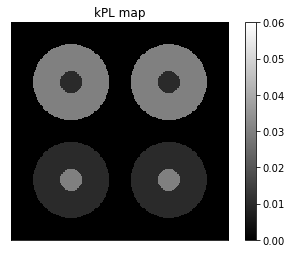

In [3]:
plt.imshow(kTRANS[:, :,128], cmap="gray", vmin=0, vmax=6e-2, interpolation="none")
plt.xticks([])
plt.yticks([])
plt.title("kTRANS map")
plt.colorbar()
plt.savefig('kTRANS_phantom_256.png', bbox_inches='tight')
plt.show()

plt.imshow(kPL[:, :,128], cmap="gray", vmin=0, vmax=6e-2, interpolation="none")
plt.xticks([])
plt.yticks([])
plt.title("kPL map")
plt.colorbar()
plt.savefig('kPL_phantom_256.png', bbox_inches='tight')
plt.show()

In [4]:
kTRANS, kPL = dynamic_phantom(16, 16, 16, 0.02, 0.05, 0.01, 0.03)

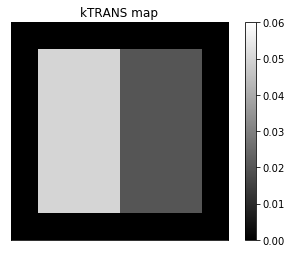

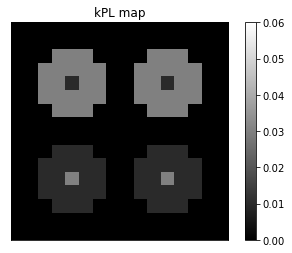

In [5]:
plt.imshow(kTRANS[:, :,8], cmap="gray", vmin=0, vmax=6e-2, interpolation="none")
plt.xticks([])
plt.yticks([])
plt.title("kTRANS map")
plt.colorbar()
plt.savefig('kTRANS_phantom_16.png', bbox_inches='tight')
plt.show()

plt.imshow(kPL[:, :,8], cmap="gray", vmin=0, vmax=6e-2, interpolation="none")
plt.xticks([])
plt.yticks([])
plt.title("kPL map")
plt.colorbar()
plt.savefig('kPL_phantom_16.png', bbox_inches='tight')
plt.show()